# Exploratory Data Analysis (EDA)

### Common questions to ask:
    1. What kind of variations exist in data?
    2. What type of knowledge is discovered from the covariance matrix of data in terms of the 
       correlations between the variables?
    3. How are the variables distributed?
    4. What kind of strategy to follow with regard to the outliers detected in a dataset?

## Python Libraries for EDA

In [1]:
import pandas as pd  # dataset
import seaborn as sns  #visualization (plottings)
import matplotlib.pyplot as plt  #visualization
import numpy as np  # arrays, algebra, dealing with numbers

## Example   
    Dataset: Iris
    Classes: 3, each refers to a type of iris flower
    Instances: 50 per class
    Features: sepal length, sepal width, petal length, petal width
    Objective: Classify flowers into one of the categories
 
<img src="./flower.JPG" style="width:200px;height:200px"/> 

Dataset: [iris.csv](https://raw.githubusercontent.com/uiuccse/data-fa14/gh-pages/data/iris.csv)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Size of the dataset and the number of features are:
(150, 5)

Column names in the dataset:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Number of samples for each flower species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


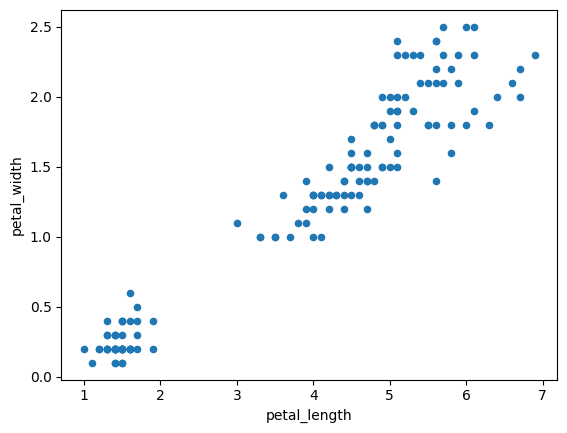

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# importing data from csv file to dataframe using pandas library
iris = pd.read_csv('iris.csv')
display(iris)

#obtaining data summary
print('Size of the dataset and the number of features are:')
print(iris.shape)
print('\nColumn names in the dataset:')
print(iris.columns)

print('\nNumber of samples for each flower species:')
print(iris["species"].value_counts())
# value count tells if the data is balanced or imbalanced
# i.e. does each column have the same number of instances/objects/samples

# scatter plot
iris.plot(kind='scatter', x='petal_length', y='petal_width')
plt.show()

## Data Visualization

### 1.   2D Scatter Plot
Most basic plot is shown above, but it can only represents two attributes. 

Can color-code the data points to distinguish between the classes using seaborn (sns) library

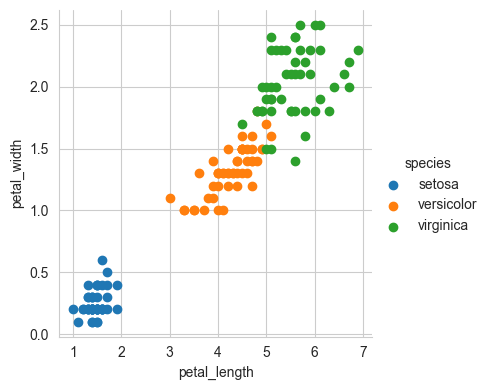

In [4]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=4) \
    .map(plt.scatter, "petal_length", "petal_width") \
    .add_legend()
plt.show()

With the old plot, at most we can infer that there is a positive correlation between petal width and petal length.

With the new colored plot, we can see the distribution of different class clusters. 

Notice the Setosa (blue) cluster is non-overlapping with the other two (orage and green). 
This means the two attribute above can distinguish between Setosa and Versicolor/Virginica, but not sufficient to distinguish between Versicolor and Virginica. Hence we need other attributes to separate out the clusters (orange and green)

[3D scatter plot](https://plotly.com/python/3d-scatter-plots/) can be used to plot all 4 attributes

### 2.   Pair-Plot
Pair-plot gives a scatter plot between all combinations of variables and explain their relationships

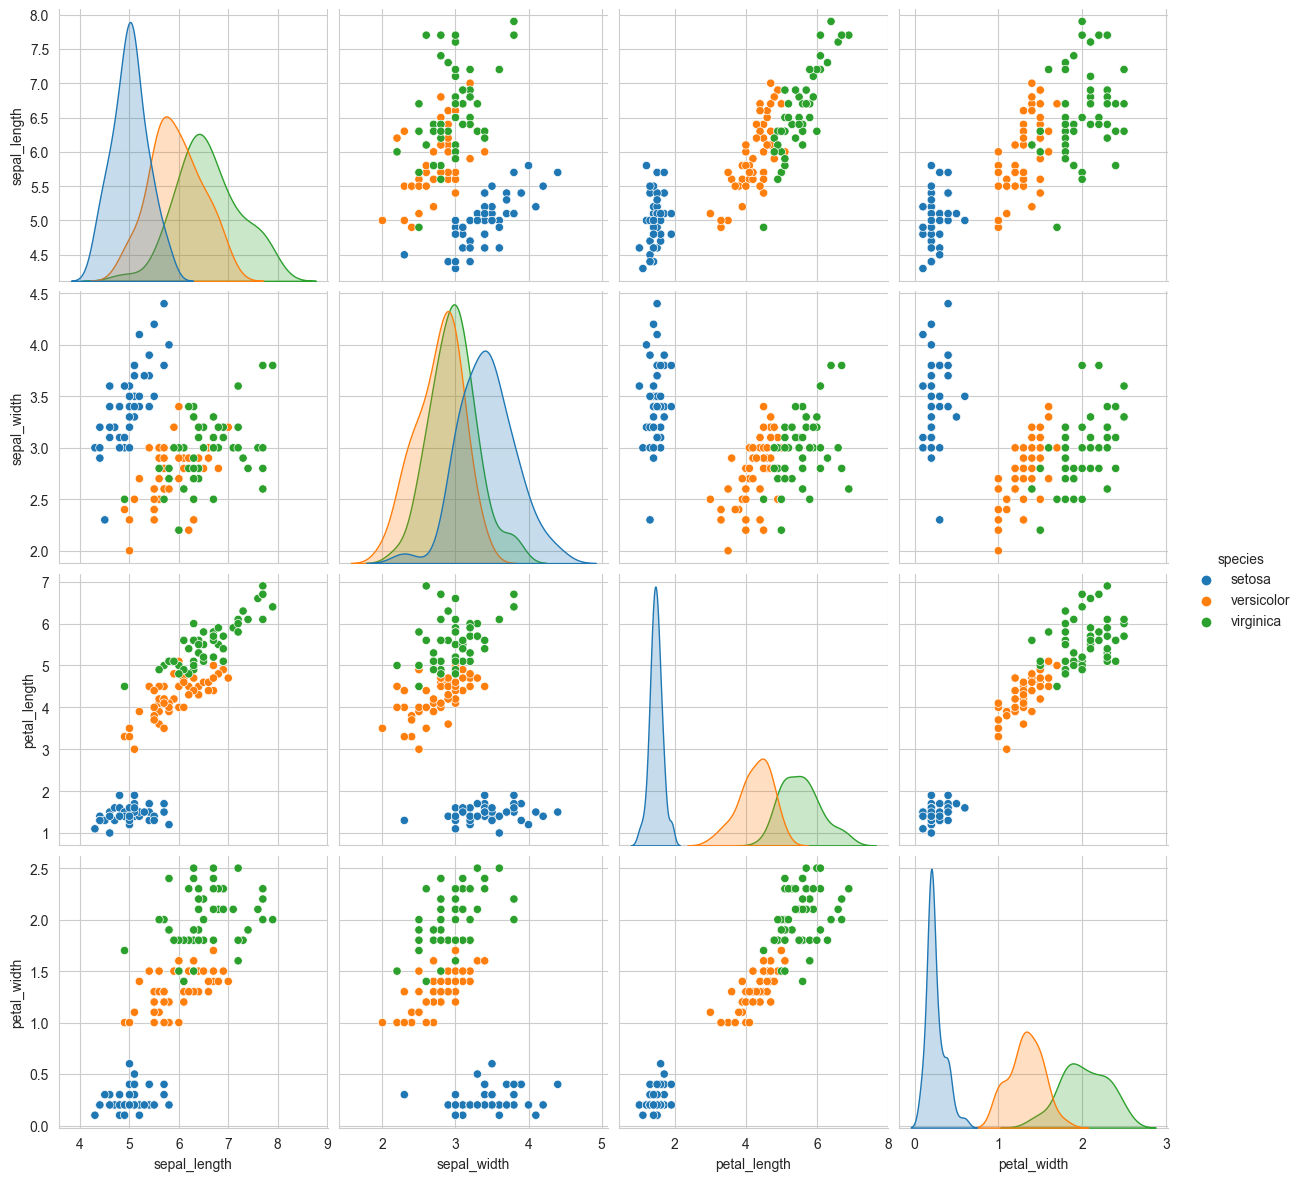

In [5]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()

From the plot, the graph with the most "ideal" best fit line indicates that the two attributes are most helpful in identifying the classes from one another. It summarizes and test different "if-else" conditions.

### 3.   Histogram 
Histogram shows the frequency/distribution of different variables in the dataset

Mostly used to inspect the underlying distribution, outliers, skewness, etc.

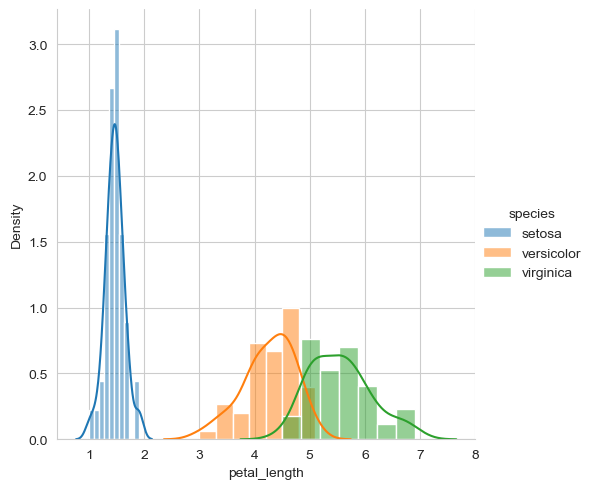

In [5]:
sns.FacetGrid(iris, hue="species", height=5) \
    .map(sns.histplot,"petal_length", kde=True, stat="density", kde_kws=dict(cut=3)) \
    .add_legend();
plt.show()
# the book used distplot, but both provide the same output

For more info about histplot, check this [link](https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751).

### 4. Probability Distribution Function (PDF)
PDF is a function that describes the likelihood of occurence of a random variables within a given range. 

Example: $P(X = 3)$. 
         $P(0 $$\leq$$ X $$\leq$$ 3) = P(X = 0) + P(X = 1) + P(X = 2) + P(X = 3)$

### 5. Cummulative Distribution Function (CDF)
CDF is a function that describe the likelihood of occurence of a random variable less than or equal to a given range.

Example: $P(X = 3) = 0$ (always), 
         $P(X $$\geq$$ 3) = 1 - P(X < 3) = 1 - P(X $$\leq$$ 2)$

<img src="./pdf_cdf.png" style="width:200px;height:200px"/> 

Image Source: [researchgate](https://www.researchgate.net/figure/PDF-and-CDF-for-the-normalized-Gaussian-distribution-N-0-1_fig2_228367678)

### 6. Box Plot or Whisker Plot

Five-number summary:
1. Minimum
2. First Quartile (25$^{th}$ percentile)
3. Median (50$^{th}$ percentile)
4. Third Quartile (75$^{th}$ percentile)
5. Maximum 

Reading the data:
1. Lower line = minimum
2. Lower end of box = first quartile
3. Middle line of box = median
4. Upper end of box = third quartile
5. Upper line - maximum
6. Dots = outliers

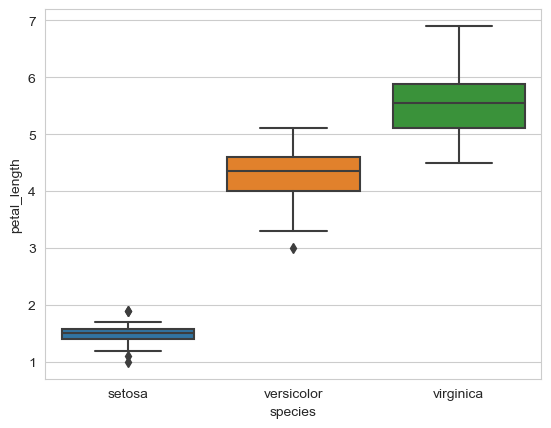

In [6]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

### 7. Violin Plot
Violin plot is a combination of box plot with kernel density plot (KDE), providing similar summary as the box plot.  

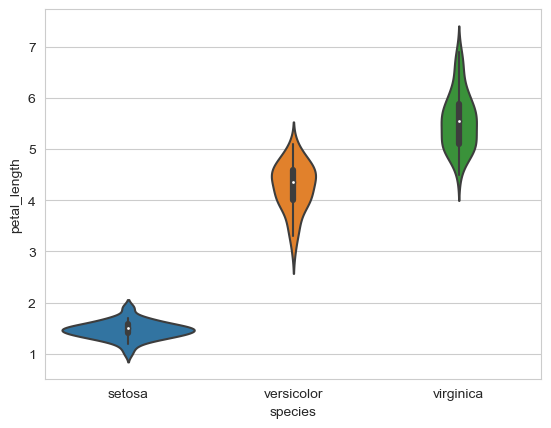

In [7]:
sns.violinplot(x='species', y='petal_length', data=iris, size=8)
plt.show()

## Univariate, Bivariate, and Multivariate Analysis
- Univariate refers to observations with a single characteristic or attribute. 
- Bivariate refers to observations with two attributes
- Multivariate refers to observations with multiple attributes. 

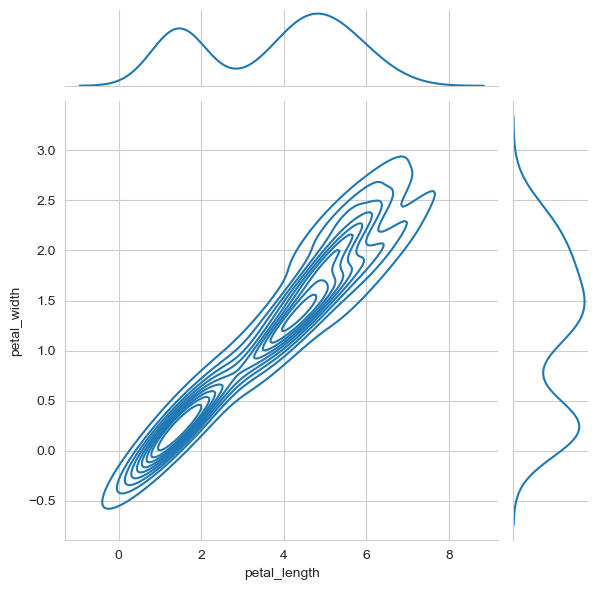

In [8]:
# bivariate plots
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind="kde")
plt.show()

The plot shows the bivariate distribution of petal_length and petal_width along with the univariate distribution of each attribute on the sides. 

## Data Analysis

$Mean = \overline{x} = \frac{1}{n} \sum_{i = 1}^{n} x_i$

In [9]:
df = pd.DataFrame(data=iris, columns=['sepal_length','sepal_width','petal_length','petal_width','species'])
iris_setosa = df.loc[df['species'] == 'setosa']
iris_versicolor = df.loc[df['species'] == 'versicolor']
iris_virginica = df.loc[df['species'] == 'virginica']

print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

# Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)))

Means:
1.464
4.26
2.4156862745098038


Variance measures the squared deviation from the mean 

$Variance = \sigma^{2} = \frac{1}{n} \sum_{i = 1}^{n} (x_i-\mu)^2 $

$Standard Deviation = \sqrt{\sigma^{2}}$

In [10]:
print("Variance:")
print(np.var(iris_setosa["petal_length"]))
print(np.var(iris_versicolor["petal_length"]))

# Variance with an outlier.
print(np.var(np.append(iris_setosa["petal_length"],50)))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Variance:
0.02950400000000001
0.21640000000000012
45.31426374471357

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


Median is the middle value of the sorted data set (if data size is odd)

If the data size is even, $Median = \frac{x_1+x_2}{2}$ where $x_1, x_2$ is the middle pairs

In [11]:
print("Medians:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

# Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)))

Medians:
1.5
5.55
4.35
1.5


$Percentile (P) = \frac{n}{N}*100$ where $n$ = ordinal rank of a given value, $N$ = numbers of values in the dataset

In [12]:
print("90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

90th Percentiles:
1.7
6.31
4.8


Quantile measures the spread of values above and below the mean by dividing the distribution into 4 groups, each contain 25% of the total observations

Interquartile range IQR is the middle 50% of values, from 25$^{th}$ percentile to 75$^{th}$ percentile

In [13]:
print("Quantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


Median absolute deviation (MAD) is the average distance between each data point and the mean

$MAD = \frac{1}{n} \sum_{i = 1}^{n} |x_i - \mu| $

In [14]:
from statsmodels import robust

print ("Median Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Performance Evaluation Metrics

- True Positive Rate (TPR): the hit rate or the proportion of accurate positive identified
- True Negative Rate (TNR): the proportion of accurate negative identified
- False Positive Rate (FPR): the rate of inaccurately identified positive
- False Negative Rate (FNR): the rate of inaccurately identified negative
- F-score or F-measures: the weighted average of the precision (p) and recall (r)
    - precision measures the percentage of **positive** samples that are correctly classified 
    - recall measures the percentage of samples that are correctly classified
- Detection Accuracy (ACC): the rate of correct classifications


<img src="table1-7.JPG"/>

Example: 
- Background: Neural network ML classifier is applied on various HPC samples for hardware-assisted malware detection 
- Stat: FN = 2, FP = 1, TP = 8, TN = 6
- Calculations:

    $ACC = \frac{TP+TN}{TP+FP+TN+FN} = \frac{8+6}{8+1+6+2} = 0.82$

    $Precision = P = \frac{TP}{FP+TP} = \frac{8}{1+8}$

    $Recall = R = \frac{TP}{FN+TP} = \frac{8}{2+8} = 0.8$

    $F-Measure = \frac{2*F*R}{P+R} = \frac{2*0.89*0.8}{0.89+0.8} = 0.84$
    
    
Textbook Chapter 1.6-1.7